# HW - Molecular Dynamics

### Name:   James O. Thomas 

In [1]:
%matplotlib inline

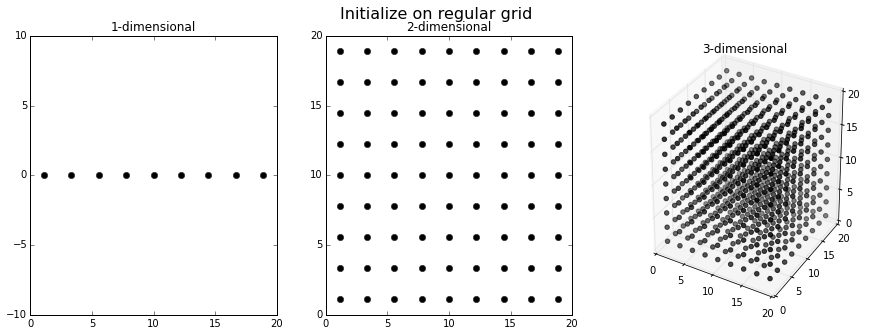

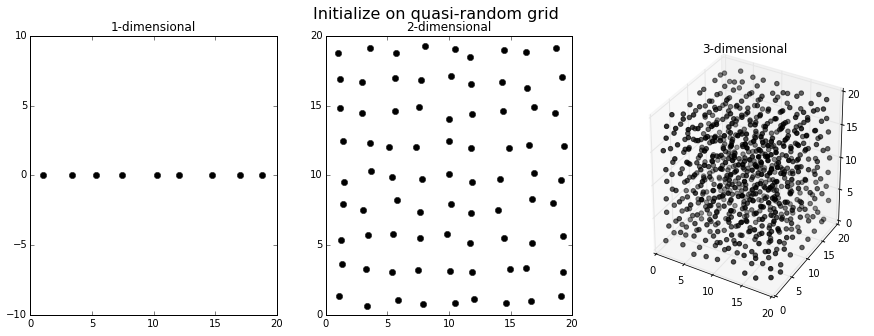

In [2]:
# December 3rd
# initialize positions on a quasi-random grid
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def Initialize(npoints, L, d = 2, randomize = True):
    nline = int(np.rint(npoints**(1./d)))
    lvals = np.linspace(0, L, nline, endpoint=False) + L/(2*nline)
    pos = np.zeros([npoints,d])
    # 3d array first
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 3:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[(np.floor(i/nline))%nline]
            pos[i,2] = lvals[np.floor(i/nline**2)]
    # 2d array next
    if d == 2:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[np.floor(i/nline)]                   
    # 1d array
    if d == 1:
        for i in range(npoints):
            pos[i,0] = lvals[i]
    # now for the random part        
    if randomize == True:
        if d == 1:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
        if d == 2:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
        if d == 3:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
                pos[i,2] = pos[i,2] + np.random.random_sample() - 0.5
    return pos

L = 20
n1d = 9

# with randomization
pos1d = Initialize(n1d,L,d=1)
pos2d = Initialize(n1d**2,L,d=2)
pos3d = Initialize(n1d**3,L,d=3)

# no randomozation
pos1dno = Initialize(n1d,L,d=1, randomize = False)
pos2dno = Initialize(n1d**2,L,d=2, randomize = False)
pos3dno = Initialize(n1d**3,L,d=3, randomize = False)

# plotting with no randomization
fig = plt.figure(figsize = (15,5))
plt.suptitle('Initialize on regular grid', size = 16)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(pos1dno,np.zeros(len(pos1dno)), 'ko')
ax1.set_xlim(0,L)
ax1.set_ylim(-L/2,L/2)
ax1.set_title('1-dimensional')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(pos2dno[:,0],pos2dno[:,1], 'ko')
ax2.set_xlim(0,L)
ax2.set_ylim(0,L)
ax2.set_title('2-dimensional')

ax3 = fig.add_subplot(133, projection = '3d')
ax3.scatter(pos3dno[:,0], pos3dno[:,1], pos3dno[:,2], color = 'k', marker = 'o')
ax3.set_xlim(0,L)
ax3.set_ylim(0,L)
ax3.set_zlim(0,L)
ax3.set_title('3-dimensional')

plt.show()

# Plotting with quasi-random distribution
fig = plt.figure(figsize = (15,5))
plt.suptitle('Initialize on quasi-random grid', size = 16)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(pos1d,np.zeros(len(pos1d)), 'ko')
ax1.set_xlim(0,L)
ax1.set_ylim(-L/2,L/2)
ax1.set_title('1-dimensional')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(pos2d[:,0],pos2d[:,1], 'ko')
ax2.set_xlim(0,L)
ax2.set_ylim(0,L)
ax2.set_title('2-dimensional')

ax3 = fig.add_subplot(133, projection = '3d')
ax3.scatter(pos3d[:,0], pos3d[:,1], pos3d[:,2], color = 'k', marker = 'o')
ax3.set_xlim(0,L)
ax3.set_ylim(0,L)
ax3.set_zlim(0,L)
ax3.set_title('3-dimensional')

plt.show()

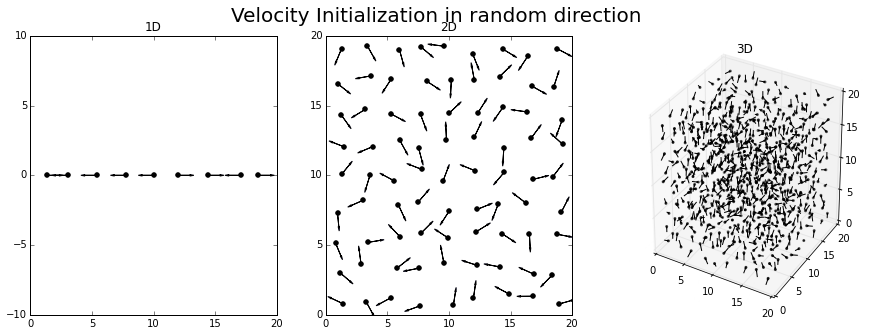

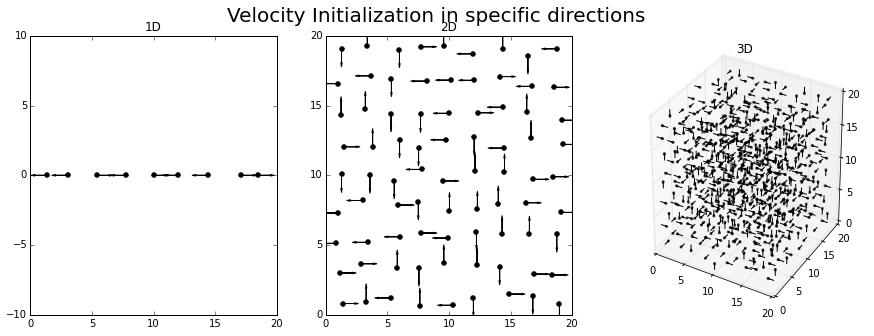

In [3]:
# Show the velocity initialization routines
# December 7th

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numba as nb
import time

@nb.jit
def pos_initialize(npoints, L, d = 2, randomize = True):
    nline = int(np.rint(npoints**(1./d)))
    lvals = np.linspace(0, L, nline, endpoint=False) + L/(2*nline)
    pos = np.zeros([npoints,d])
    # 3d array first
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 3:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[(np.floor(i/nline))%nline]
            pos[i,2] = lvals[np.floor(i/nline**2)]
    # 2d array next
    if d == 2:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[np.floor(i/nline)]                   
    # 1d array
    if d == 1:
        for i in range(npoints):
            pos[i,0] = lvals[i]
    # now for the random part        
    if randomize == True:
        if d == 1:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
        if d == 2:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
        if d == 3:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
                pos[i,2] = pos[i,2] + np.random.random_sample() - 0.5
    return pos

@nb.jit
def vel_initialize(npoints, v_max=1, d=2):
    vel = np.zeros([npoints,d])
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 1:
        cut = int(npoints/2)
        vel[0:cut,0] = 1 # move right
        vel[cut:,0] = -1 # move left
        np.random.shuffle(vel) # have to shuffle because of how i assign the positions
    if d ==2 :
        angles = np.random.random_sample(npoints)*2*np.pi
        vel[:,0] = np.cos(angles)
        vel[:,1] = np.sin(angles)
    if d == 3:
        u = np.random.random_sample(npoints)
        v = np.random.random_sample(npoints)
        theta = 2*np.pi*u
        phi = np.arccos(2*v-1)
        vel[:,0] = np.sin(theta)*np.cos(phi)
        vel[:,1] = np.sin(theta)*np.sin(phi)
        vel[:,2] = np.cos(theta)
    return vel

@nb.jit
def vel_initialize2(npoints, v_max = 1, d = 2):
    vel = np.zeros([npoints,d])
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 1:
        cut = int(npoints/2)
        vel[0:cut,0] = 1 # move right
        vel[cut:,0] = -1 # move left
        np.random.shuffle(vel) # have to shuffle because of how i assign the positions
    if d == 2:
        cut = int(np.rint(npoints/4))
        vel[0:cut,:] = [0,1]                    # moving up
        vel[cut:int(2*cut),:] = [0,-1]          # moving down
        vel[int(2*cut):int(3*cut),:] = [1,0]    # moving right
        vel[int(3*cut):,:] = [-1,0]             # moving left
        np.random.shuffle(vel)
    if d == 3:
        cut = int(np.rint(npoints/6))
        vel[0:cut,0] = 1                        # right
        vel[cut:int(2*cut),0] = -1              # left
        vel[int(2*cut):int(3*cut),1] = 1        # up
        vel[int(3*cut):int(4*cut),1] = -1       # down
        vel[int(4*cut):int(5*cut),2] = 1        # forward
        vel[int(5*cut):,2] = -1                 # backward
        np.random.shuffle(vel)
    return vel

def V(r):
    # the potential with sigma = 1
    if r > 3:
        return 0
    else:
        return 4*((1/r)**12 - (1/r)**6)

@nb.jit
def F(r):
    # the magnitude of the force with sigma = 1
    return 24*(2*(1/r)**13 - (1/r)**7)

@nb.jit
def Force_Accumulator(pos, npoints, d=2):
    # basically a copy of N-Body simulation (FIXED version)
    Force = np.zeros([npoints,d])
    if d == 1:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                if dx > L/2:
                    dx -= L
                if dx < -L/2:
                    dx += L
                r_ij = np.abs(dx)
                F_ij = F(r_ij)*dx/r_ij
                Force[i] += F_ij
                Force[j] -= F_ij
    if d == 2:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                dy = pos[i,1]-pos[j,1]
                if dx > L/2:
                    dx -= L
                if dy > L/2:
                    dy -= L
                if dx < -L/2:
                    dx += L
                if dy < -L/2:
                    dy += L
                dr = np.array([dx,dy])
                r_ij = np.linalg.norm(dr)
                F_ij = F(r_ij)*dr/r_ij
                Force[i] += F_ij
                Force[j] += -F_ij
    if d == 3:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                dy = pos[i,1]-pos[j,1]
                dz = pos[i,2]-pos[j,2]
                if dx > L/2:
                    dx -= L
                if dy > L/2:
                    dy -= L
                if dz > L/2:
                    dz -= L
                if dx < -L/2:
                    dx += L
                if dy < -L/2:
                    dy += L
                if dx < -L/2:
                    dz += L
                dr = np.array([dx,dy,dz])
                r_ij = np.linalg.norm(dr)
                F_ij = F(r_ij)*dr/r_ij
                Force[i] += F_ij
                Force[j] += -F_ij
    return Force

@nb.jit
def PBCs(pos, index, L):
    shift = np.floor(pos[:,:,index+1]/L)*L
    #print(shift)
    pos[:,:,index+1] -= shift
    pos[:,:,index] -= shift
    #if index < 10:
    #    print(index)
    #    print(shift)
    #    print(pos[:,:,index+1])
    return pos

L = 20
ntimes = 500
dt = 0.004
npts1d = 9
npts2d = 9**2
npts3d = 9**3

pos1d = pos_initialize(npts1d,L,1,randomize=True)
pos2d = pos_initialize(npts2d,L,2,randomize=True)
pos3d = pos_initialize(npts3d,L,3,randomize=True)

# random direction of velocity
vel1d = vel_initialize(npts1d,d=1)
vel2d = vel_initialize(npts2d,d=2)
vel3d = vel_initialize(npts3d,d=3)

fig = plt.figure(figsize=(15,5))
plt.suptitle('Velocity Initialization in random direction', size = 20)

ax1 = fig.add_subplot(131)
ax1.set_title('1D')
ax1.scatter(pos1d[:,0],np.zeros(npts1d),color = 'k')
ax1.set_xlim(0,L)
ax1.set_ylim(-L/2,L/2)
for i in range(npts1d):
     ax1.arrow(pos1d[i,0],0,vel1d[i,0],0,head_width=0.1,head_length=0.3)

ax2 = fig.add_subplot(132)
ax2.set_title('2D')
ax2.scatter(pos2d[:,0],pos2d[:,1], color = 'k')
ax2.set_xlim(0,L)
ax2.set_ylim(0,L)
for i in range(npts2d):
     plt.arrow(pos2d[i,0],pos2d[i,1],vel2d[i,0],vel2d[i,1],head_width=0.1,head_length=0.3)

ax3 = fig.add_subplot(133, projection = '3d')
ax3.scatter(pos3d[:,0], pos3d[:,1], pos3d[:,2], s=4, color = 'k', marker = 'o')
ax3.set_xlim(0,L)
ax3.set_ylim(0,L)
ax3.set_zlim(0,L)
ax3.set_title('3D')
ax3.quiver(pos3d[:,0],pos3d[:,1],pos3d[:,2],vel3d[:,0],vel3d[:,1],vel3d[:,2],color = 'k')

plt.show()

# velocity in unit directions
vel1d = vel_initialize2(npts1d,d=1)
vel2d = vel_initialize2(npts2d,d=2)
vel3d = vel_initialize2(npts3d,d=3)

fig = plt.figure(figsize=(15,5))
plt.suptitle('Velocity Initialization in specific directions', size = 20)

ax1 = fig.add_subplot(131)
ax1.set_title('1D')
ax1.scatter(pos1d[:,0],np.zeros(npts1d), color = 'k')
ax1.set_xlim(0,L)
ax1.set_ylim(-L/2,L/2)
for i in range(npts1d):
     ax1.arrow(pos1d[i,0],0,vel1d[i,0],0,head_width=0.1,head_length=0.3)

ax2 = fig.add_subplot(132)
ax2.set_title('2D')
ax2.scatter(pos2d[:,0],pos2d[:,1],color='k')
ax2.set_xlim(0,L)
ax2.set_ylim(0,L)
for i in range(npts2d):
     plt.arrow(pos2d[i,0],pos2d[i,1],vel2d[i,0],vel2d[i,1],head_width=0.1,head_length=0.3)

ax3 = fig.add_subplot(133, projection = '3d')
ax3.scatter(pos3d[:,0], pos3d[:,1], pos3d[:,2], s=4, color = 'k', marker = 'o')
ax3.set_xlim(0,L)
ax3.set_ylim(0,L)
ax3.set_zlim(0,L)
ax3.set_title('3D')
ax3.quiver(pos3d[:,0],pos3d[:,1],pos3d[:,2],vel3d[:,0],vel3d[:,1],vel3d[:,2],color = 'k')
# where did the arrow heads go?

plt.show()


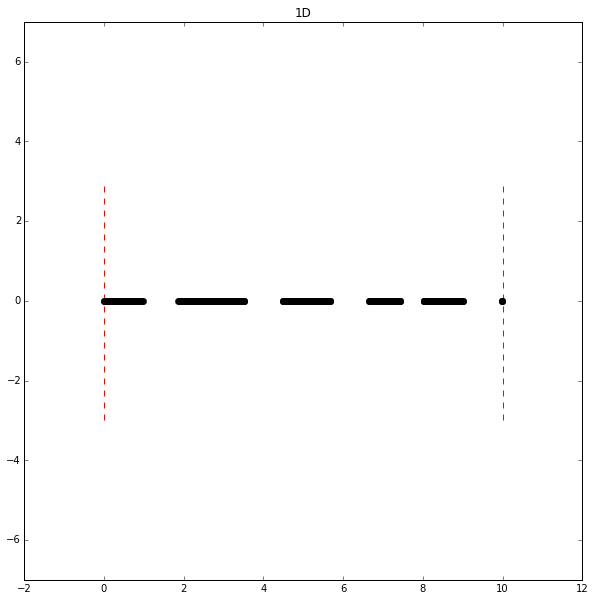

Execution time for  1  dimensions =  3.08


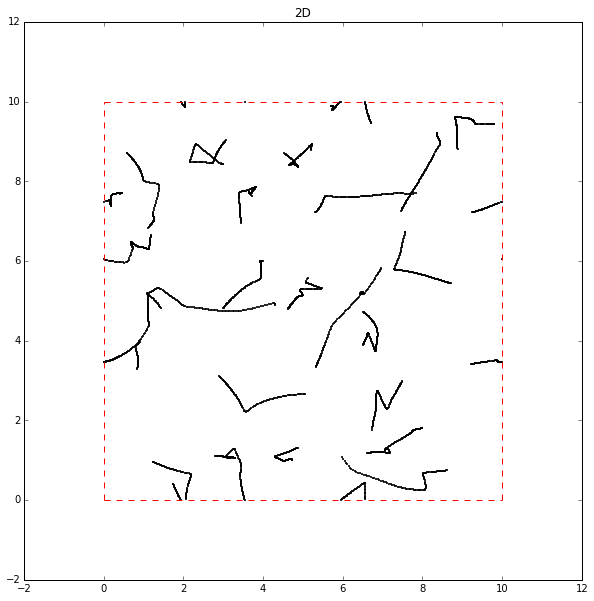

Execution time for  2  dimensions =  6.3


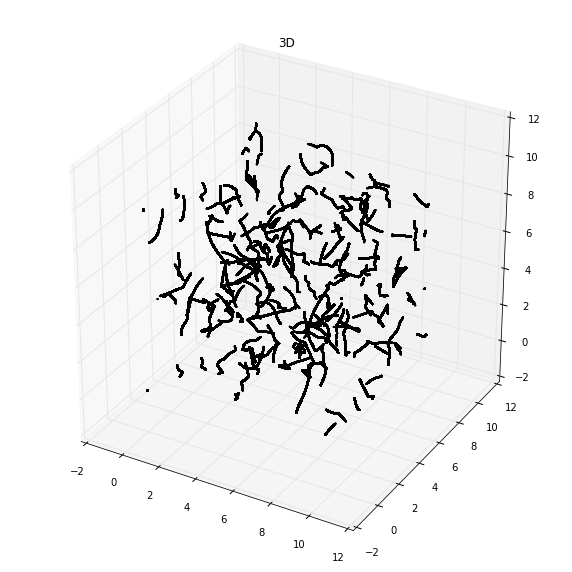

Execution time for  3  dimensions =  1103.66


In [2]:
# December 7th

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numba as nb
import time

@nb.jit
def pos_initialize(npoints, L, d = 2, randomize = True):
    nline = int(np.rint(npoints**(1./d)))
    lvals = np.linspace(0, L, nline, endpoint=False) + L/(2*nline)
    pos = np.zeros([npoints,d])
    # 3d array first
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 3:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[(np.floor(i/nline))%nline]
            pos[i,2] = lvals[np.floor(i/nline**2)]
    # 2d array next
    if d == 2:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[np.floor(i/nline)]                   
    # 1d array
    if d == 1:
        for i in range(npoints):
            pos[i,0] = lvals[i]
    # now for the random part        
    if randomize == True:
        if d == 1:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
        if d == 2:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
        if d == 3:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
                pos[i,2] = pos[i,2] + np.random.random_sample() - 0.5
    return pos

@nb.jit
def vel_initialize(npoints, v_max=1, d=2):
    vel = np.zeros([npoints,d])
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 1:
        cut = int(npoints/2)
        vel[0:cut,0] = 1 # move right
        vel[cut:,0] = -1 # move left
        np.random.shuffle(vel) # have to shuffle because of how i assign the positions
    if d ==2 :
        angles = np.random.random_sample(npoints)*2*np.pi
        vel[:,0] = np.cos(angles)
        vel[:,1] = np.sin(angles)
    if d == 3:
        u = np.random.random_sample(npoints)
        v = np.random.random_sample(npoints)
        theta = 2*np.pi*u
        phi = np.arccos(2*v-1)
        vel[:,0] = np.sin(theta)*np.cos(phi)
        vel[:,1] = np.sin(theta)*np.sin(phi)
        vel[:,2] = np.cos(theta)
    return vel

@nb.jit
def vel_initialize2(npoints, v_max = 1, d = 2):
    vel = np.zeros([npoints,d])
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 1:
        cut = int(npoints/2)
        vel[0:cut,0] = 1 # move right
        vel[cut:,0] = -1 # move left
        np.random.shuffle(vel) # have to shuffle because of how i assign the positions
    if d == 2:
        cut = int(np.rint(npoints/4))
        vel[0:cut,:] = [0,1]                    # moving up
        vel[cut:int(2*cut),:] = [0,-1]          # moving down
        vel[int(2*cut):int(3*cut),:] = [1,0]    # moving right
        vel[int(3*cut):,:] = [-1,0]             # moving left
        np.random.shuffle(vel)
    if d == 3:
        cut = int(np.rint(npoints/6))
        vel[0:cut,0] = 1                        # right
        vel[cut:int(2*cut),0] = -1              # left
        vel[int(2*cut):int(3*cut),1] = 1        # up
        vel[int(3*cut):int(4*cut),1] = -1       # down
        vel[int(4*cut):int(5*cut),2] = 1        # forward
        vel[int(5*cut):,2] = -1                 # backward
        np.random.shuffle(vel)
    return vel

def V(r):
    # the potential with sigma = 1
    if r > 3:
        return 0
    else:
        return 4*((1/r)**12 - (1/r)**6)

@nb.jit
def F(r):
    # the magnitude of the force with sigma = 1
    return 24*(2*(1/r)**13 - (1/r)**7)

@nb.jit
def Force_Accumulator(pos, npoints, d=2):
    # basically a copy of N-Body simulation (FIXED version)
    Force = np.zeros([npoints,d])
    if d == 1:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                if dx > L/2:
                    dx -= L
                if dx < -L/2:
                    dx += L
                r_ij = np.abs(dx)
                F_ij = F(r_ij)*dx/r_ij
                Force[i] += F_ij
                Force[j] -= F_ij
    if d == 2:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                dy = pos[i,1]-pos[j,1]
                if dx > L/2:
                    dx -= L
                if dy > L/2:
                    dy -= L
                if dx < -L/2:
                    dx += L
                if dy < -L/2:
                    dy += L
                dr = np.array([dx,dy])
                r_ij = np.linalg.norm(dr)
                F_ij = F(r_ij)*dr/r_ij
                Force[i] += F_ij
                Force[j] += -F_ij
    if d == 3:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                dy = pos[i,1]-pos[j,1]
                dz = pos[i,2]-pos[j,2]
                if dx > L/2:
                    dx -= L
                if dy > L/2:
                    dy -= L
                if dz > L/2:
                    dz -= L
                if dx < -L/2:
                    dx += L
                if dy < -L/2:
                    dy += L
                if dx < -L/2:
                    dz += L
                dr = np.array([dx,dy,dz])
                r_ij = np.linalg.norm(dr)
                F_ij = F(r_ij)*dr/r_ij
                Force[i] += F_ij
                Force[j] += -F_ij
    return Force

@nb.jit
def PBCs(pos, index, L):
    shift = np.floor(pos[:,:,index+1]/L)*L
    pos[:,:,index+1] -= shift
    pos[:,:,index] -= shift
    return pos

dims = [1,2,3]
L = 10
ntimes = 500
dt = 0.004


for d in dims:
    t_start = time.time()
    npoints = 5**d
    positions = np.zeros([npoints,d,ntimes])
    velocities = np.zeros([npoints,d,ntimes])

    positions[:,:,1] = pos_initialize(npoints,L,d=d)
    velocities[:,:,0] = vel_initialize(npoints,d=d)
    positions[:,:,0] = positions[:,:,1] - velocities[:,:,0]*dt

    if d == 1:
        plt.figure(figsize=(10,10))
        plt.title('1D')
        plt.ylim(-7,7)
        plt.xlim(-2,12)
        plt.plot([0,0],[-3,3],'r--')
        plt.plot([10,10],[-3,3],'r--')
    
        for t in range(1,ntimes-1):
            Force = Force_Accumulator(positions[:,:,t],npoints,d=d)
            positions[:,:,t+1] = 2*positions[:,:,t] - positions[:,:,t-1] + Force*dt**2
            #velocities[:,:,t] = (positions[:,:,t+1]-positions[:,:,t-1])/(2*dt)
            positions = PBCs(positions, t, L)
            if t%5==0:
                plt.plot(positions[:,0,t],np.zeros(npoints), 'ko')        
        plt.show()
        
    if d == 2:
        plt.figure(figsize=(10,10))
        plt.title('2D')
        plt.plot([0,10],[0,0],'r--')
        plt.plot([0,10],[10,10],'r--')
        plt.plot([0,0],[0,10],'r--')
        plt.plot([10,10],[0,10],'r--')
        plt.xlim(-2,12)
        plt.ylim(-2,12)

        for t in range(1,ntimes-1):
            Force = Force_Accumulator(positions[:,:,t],npoints,d=d)
            positions[:,:,t+1] = 2*positions[:,:,t] - positions[:,:,t-1] + Force*dt**2
            #velocities[:,:,t] = (positions[:,:,t+1]-positions[:,:,t-1])/(2*dt)
            positions = PBCs(positions, t, L)
            if t%5==0:
                plt.scatter(positions[:,0,t], positions[:,1,t], s=1, c = 'k')
        plt.show()
        
    if d == 3:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection = '3d')
        ax.set_xlim(-2,12)
        ax.set_ylim(-2,12)
        ax.set_zlim(-2,12)
        ax.set_title('3D')
        
        for t in range(1,ntimes-1):
            Force = Force_Accumulator(positions[:,:,t],npoints,d=d)
            positions[:,:,t+1] = 2*positions[:,:,t] - positions[:,:,t-1] + Force*dt**2
            #velocities[:,:,t] = (positions[:,:,t+1]-positions[:,:,t-1])/(2*dt)
            positions = PBCs(positions, t, L)
            if t%5==0:
                ax.scatter(positions[:,0], positions[:,1], positions[:,2], s=1, c = 'k')
        plt.show()
    print('Execution time for ',d,' dimensions = ',round(time.time()-t_start,2), flush=True)

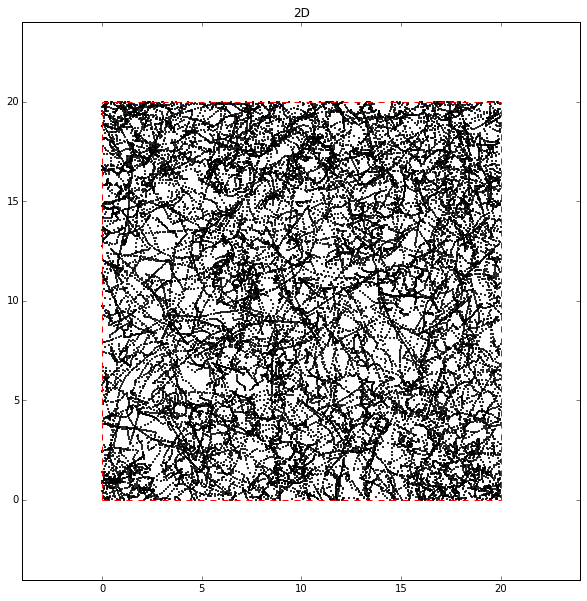

Execution time for  2  dimensions =  208.09


In [11]:
# December 7th
# Run the MD simulation and then save the velocity data

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numba as nb
import time

@nb.jit
def pos_initialize(npoints, L, d = 2, randomize = True):
    nline = int(np.rint(npoints**(1./d)))
    lvals = np.linspace(0, L, nline, endpoint=False) + L/(2*nline)
    pos = np.zeros([npoints,d])
    # 3d array first
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 3:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[(np.floor(i/nline))%nline]
            pos[i,2] = lvals[np.floor(i/nline**2)]
    # 2d array next
    if d == 2:
        for i in range(npoints):
            pos[i,0] = lvals[i%nline]
            pos[i,1] = lvals[np.floor(i/nline)]                   
    # 1d array
    if d == 1:
        for i in range(npoints):
            pos[i,0] = lvals[i]
    # now for the random part        
    if randomize == True:
        if d == 1:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
        if d == 2:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
        if d == 3:
            for i in range(npoints):
                pos[i,0] = pos[i,0] + np.random.random_sample() - 0.5
                pos[i,1] = pos[i,1] + np.random.random_sample() - 0.5
                pos[i,2] = pos[i,2] + np.random.random_sample() - 0.5
    return pos

@nb.jit
def vel_initialize(npoints, v_max=1, d=2):
    vel = np.zeros([npoints,d])
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 1:
        cut = int(npoints/2)
        vel[0:cut,0] = 1 # move right
        vel[cut:,0] = -1 # move left
        np.random.shuffle(vel) # have to shuffle because of how i assign the positions
    if d ==2 :
        angles = np.random.random_sample(npoints)*2*np.pi
        vel[:,0] = np.cos(angles)
        vel[:,1] = np.sin(angles)
    if d == 3:
        u = np.random.random_sample(npoints)
        v = np.random.random_sample(npoints)
        theta = 2*np.pi*u
        phi = np.arccos(2*v-1)
        vel[:,0] = np.sin(theta)*np.cos(phi)
        vel[:,1] = np.sin(theta)*np.sin(phi)
        vel[:,2] = np.cos(theta)
    return vel

@nb.jit
def vel_initialize2(npoints, v_max = 1, d = 2):
    vel = np.zeros([npoints,d])
    if d > 3:
        print('Initialization only works for 1, 2, or 3 dimensions')
    if d == 1:
        cut = int(npoints/2)
        vel[0:cut,0] = 1 # move right
        vel[cut:,0] = -1 # move left
        np.random.shuffle(vel) # have to shuffle because of how i assign the positions
    if d == 2:
        cut = int(np.rint(npoints/4))
        vel[0:cut,:] = [0,1]                    # moving up
        vel[cut:int(2*cut),:] = [0,-1]          # moving down
        vel[int(2*cut):int(3*cut),:] = [1,0]    # moving right
        vel[int(3*cut):,:] = [-1,0]             # moving left
        np.random.shuffle(vel)
    if d == 3:
        cut = int(np.rint(npoints/6))
        vel[0:cut,0] = 1                        # right
        vel[cut:int(2*cut),0] = -1              # left
        vel[int(2*cut):int(3*cut),1] = 1        # up
        vel[int(3*cut):int(4*cut),1] = -1       # down
        vel[int(4*cut):int(5*cut),2] = 1        # forward
        vel[int(5*cut):,2] = -1                 # backward
        np.random.shuffle(vel)
    return vel

def V(r):
    # the potential with sigma = 1
    if r > 3:
        return 0
    else:
        return 4*((1/r)**12 - (1/r)**6)

@nb.jit
def F(r):
    # the magnitude of the force with sigma = 1
    return 24*(2*(1/r)**13 - (1/r)**7)

@nb.jit
def Force_Accumulator(pos, npoints, d=2):
    # basically a copy of N-Body simulation (FIXED version)
    Force = np.zeros([npoints,d])
    if d == 1:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                if dx > L/2:
                    dx -= L
                if dx < -L/2:
                    dx += L
                r_ij = np.abs(dx)
                F_ij = F(r_ij)*dx/r_ij
                Force[i] += F_ij
                Force[j] -= F_ij
    if d == 2:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                dy = pos[i,1]-pos[j,1]
                if dx > L/2:
                    dx -= L
                if dy > L/2:
                    dy -= L
                if dx < -L/2:
                    dx += L
                if dy < -L/2:
                    dy += L
                dr = np.array([dx,dy])
                r_ij = np.linalg.norm(dr)
                F_ij = F(r_ij)*dr/r_ij
                Force[i] += F_ij
                Force[j] += -F_ij
    if d == 3:
        for i in range(npoints-1):
            for j in range(i+1,npoints):
                dx = pos[i,0]-pos[j,0]
                dy = pos[i,1]-pos[j,1]
                dz = pos[i,2]-pos[j,2]
                if dx > L/2:
                    dx -= L
                if dy > L/2:
                    dy -= L
                if dz > L/2:
                    dz -= L
                if dx < -L/2:
                    dx += L
                if dy < -L/2:
                    dy += L
                if dx < -L/2:
                    dz += L
                dr = np.array([dx,dy,dz])
                r_ij = np.linalg.norm(dr)
                F_ij = F(r_ij)*dr/r_ij
                Force[i] += F_ij
                Force[j] += -F_ij
    return Force

@nb.jit
def PBCs(pos, index, L):
    shift = np.floor(pos[:,:,2]/L)*L
    #print(shift)
    pos[:,:,2] -= shift
    pos[:,:,1] -= shift
    return pos

def P(v):
    kT = 0.5
    v2 = (np.linalg.norm(v))**2
    P = v2/kT*np.exp(-v2/(2*kT))
    return P
    
def Pxy(v):
    kT = 0.5
    Pxy = 1/np.sqrt(kT)*np.exp(-v**2/(2*kT))
    return Pxy

dims = [2]
L = 20
ntimes = 2000
dt = 0.02
n1d = 9


for d in dims:
    t_start = time.time()
    npoints = n1d**d
    positions = np.zeros([npoints,d,3])
    velocities = np.zeros([npoints,d,ntimes])
    vmag = np.zeros([npoints,ntimes])

    positions[:,:,1] = pos_initialize(npoints,L,d=d)
    velocities[:,:,0] = vel_initialize(npoints,d=d)
    positions[:,:,0] = positions[:,:,1] - velocities[:,:,0]*dt

    if d == 1:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        ax.set_title('1D')
        ax.set_ylim(-7,7)
        ax.set_xlim(-2,12)
        ax.plot([0,0],[-3,3],'r--')
        ax.plot([L,L],[-3,3],'r--')
    
        for t in range(1,ntimes-1):
            Force = Force_Accumulator(positions[:,:,1],npoints,d=d)
            positions[:,:,2] = 2*positions[:,:,1] - positions[:,:,0] + Force*dt**2
            velocities[:,:,t] = (positions[:,:,2]-positions[:,:,0])/(2*dt)
            positions = PBCs(positions, t, L)
            positions[:,:,0], positions[:,:,1] = positions[:,:,1], positions[:,:,2] # roll the values
            if t%5==0:
                ax.plot(positions[:,0,2],np.zeros(npoints), 'ko')        
        plt.show()
        
    if d == 2:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        ax.set_title('2D')
        ax.plot([0,L],[0,0],'r--')
        ax.plot([0,L],[L,L],'r--')
        ax.plot([0,0],[0,L],'r--')
        ax.plot([L,L],[0,L],'r--')
        ax.set_xlim(-0.2*L,1.2*L)
        ax.set_ylim(-0.2*L,1.2*L)

        for t in range(1,ntimes-1):
            Force = Force_Accumulator(positions[:,:,1],npoints,d=d)
            positions[:,:,2] = 2*positions[:,:,1] - positions[:,:,0] + Force*dt**2
            velocities[:,:,t] = (positions[:,:,2]-positions[:,:,0])/(2*dt)
            positions = PBCs(positions, t, L)
            positions[:,:,0], positions[:,:,1] = positions[:,:,1], positions[:,:,2] # roll the values
            if t%5==0:
                ax.scatter(positions[:,0,1], positions[:,1,1], s=1, c = 'k')
        plt.show()
        
    if d == 3:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection = '3d')
        ax.set_xlim(-0.2*L,1.2*L)
        ax.set_ylim(-0.2*L,1.2*L)
        ax.set_zlim(-0.2*L,1.2*L)
        ax.set_title('3D')
        
        for t in range(1,ntimes-1):
            Force = Force_Accumulator(positions[:,:,1],npoints,d=d)
            positions[:,:,2] = 2*positions[:,:,1] - positions[:,:,0] + Force*dt**2
            velocities[:,:,t] = (positions[:,:,2]-positions[:,:,0])/(2*dt)
            positions = PBCs(positions, t, L)
            positions[:,:,0], positions[:,:,1] = positions[:,:,1], positions[:,:,2] # roll the values
            if t%5==0:
                ax.scatter(positions[:,0], positions[:,1], positions[:,2], s=1, c = 'k')
        plt.show()
    print('Execution time for ',d,' dimensions = ',round(time.time()-t_start,2), flush=True)
    
    np.save('MD_vel_'+str(d)+'D',velocities)    

(81, 2, 2000)


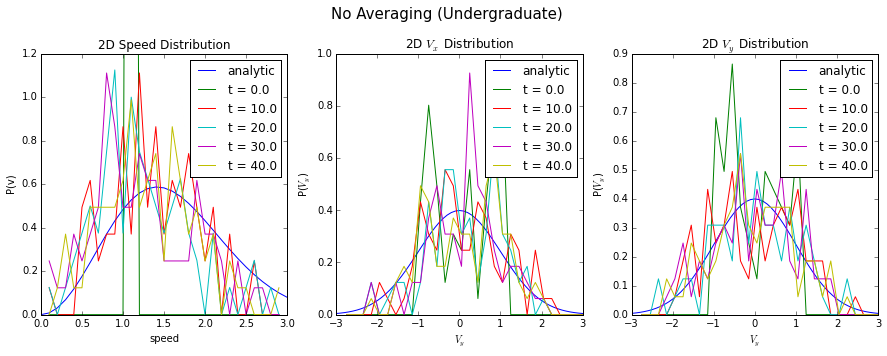

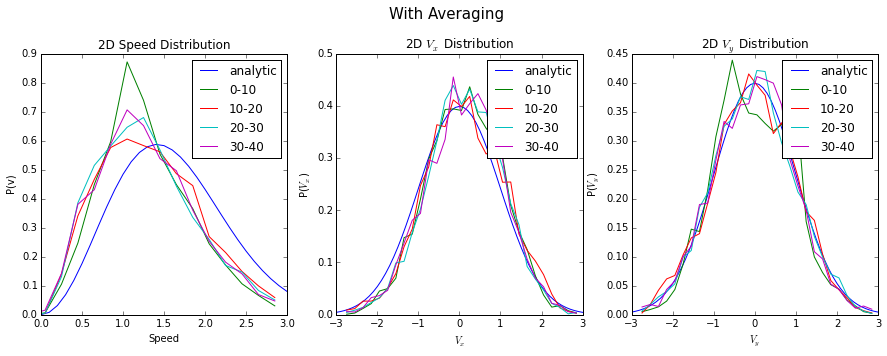

In [27]:
# Now plot the boltzman distribution stuff from the saved data
import numpy as np
import matplotlib.pyplot as plt

velocities = np.load('MD_vel_2D.npy')
print(np.shape(velocities))
npoints, d, ntimes = np.shape(velocities)

dt = 0.02
times = np.array([0,10,20,30,39.9])
nts = (times/dt)
nts.astype(int)

##############################
# the analytic Distributions #
##############################

KT = 1
C = np.sqrt((1/(2*np.pi*KT))**3)*4*np.pi      # sqrt((m/2pikT)^3)*4pi    From Wikipedia (3D???)
Cx = np.sqrt(1/(2*np.pi*KT))                  # sqrt(m/(2pikT))
v_analytic = np.arange(-4,4,0.1)
speed_analytic = C*v_analytic**2/KT*np.exp(-v_analytic**2/(2*KT))
Vxy_analytic = Cx/np.sqrt(KT)*np.exp(-v_analytic**2/(2*KT))

###############################
# Plot at specific time steps #
###############################

fig = plt.figure(figsize = (15,5))
plt.suptitle('No Averaging (Undergraduate)', size=15)

# The speed distribution
ax = fig.add_subplot(131)
ax.set_title(str(d)+'D Speed Distribution')
ax.plot(v_analytic,speed_analytic,label = 'analytic')
ax.set_xlabel('speed')
ax.set_ylabel('P(v)')
for i in range(len(nts)):
    t_index = nts[i]
    vel2 = np.zeros(npoints)
    for p in range(npoints):
        vel2[p] = (np.linalg.norm(velocities[p,:,t_index]))
    n, bins = np.histogram(vel2, bins = np.arange(0,2.95,0.1), normed=True)
    bins = bins[0:len(bins)-1]
    bins = bins + (bins[1]-bins[0])
    ax.plot(bins,n,label = 't = '+str(np.rint(times[i])))
    ax.set_ylim(0,1.2)
    ax.set_xlim(0,3)
    ax.legend()

# Vx distribution
ax = fig.add_subplot(132)
ax.set_title(str(d)+r'D $V_x$ Distribution')
ax.plot(v_analytic,Vxy_analytic,label = 'analytic')
ax.set_xlabel(r'$V_y$')
ax.set_ylabel(r'P($V_y$)')
for i in range(len(nts)):
    t_index = nts[i]
    n, bins = np.histogram(velocities[:,0,t_index], bins = np.arange(-2.95,9.95,0.2), normed=True)
    np.asarray(n)
    np.asarray(bins)
    bins = bins + (bins[1]-bins[0])
    bins = bins[0:len(bins)-1]
    ax.plot(bins,n, label = 't = '+str(np.rint(times[i])))
    ax.set_xlim(-3,3)
    ax.legend()

# Vy distribution
ax = fig.add_subplot(133)
ax.set_title(str(d)+r'D $V_y$ Distribution')
ax.plot(v_analytic,Vxy_analytic,label = 'analytic')
ax.set_xlabel(r'$V_y$')
ax.set_ylabel(r'P($V_y$)')
for i in range(len(nts)):
    t_index = nts[i]
    n, bins = np.histogram(velocities[:,1,t_index], bins = np.arange(-2.95,9.95,0.2), normed=True)
    np.asarray(n)
    np.asarray(bins)
    bins = bins + (bins[1]-bins[0])
    bins = bins[0:len(bins)-1]
    ax.plot(bins,n, label = 't = '+str(np.rint(times[i])))
    ax.set_xlim(-3,3)
    ax.legend()
    
plt.subplots_adjust(top = 0.85)    
plt.show()

######################
# Now with averaging #
######################

N_average = 500
n_of_averages = int(ntimes/N_average)
t_step = int(dt*N_average)

fig = plt.figure(figsize = (15,5))
plt.suptitle('With Averaging', size = 15)

# The speed distribution
ax = fig.add_subplot(131)
ax.set_title(str(d)+'D Speed Distribution')
ax.plot(v_analytic,speed_analytic,label = 'analytic')
ax.set_xlim(0,3)
vel2 = np.zeros([npoints,ntimes])
ax.set_xlabel('Speed')
ax.set_ylabel('P(v)')
for t in range(ntimes):
    for p in range(npoints):
        vel2[p,t] = (np.linalg.norm(velocities[p,:,t]))
ntotals = np.zeros([4,29])
for i in range(ntimes):
    if i < N_average:
        n, bins = np.histogram(vel2[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True )
        ntotals[0,:] = ntotals[0,:] + n
    elif i < 2*N_average:
        n, bins = np.histogram(vel2[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[1,:] += n
    elif i < 3*N_average:
        n, bins = np.histogram(vel2[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[2,:] += n
    else:
        n, bins = np.histogram(vel2[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[3,:] += n

ntotals = ntotals/N_average
bins = bins[0:len(bins)-1]
bins = bins + (bins[1]-bins[0])
for i in range(len(ntotals)):
    if i == 0:
        ax.plot(bins,ntotals[i,:], label = '0-10')
    if i == 1:
        ax.plot(bins,ntotals[i,:], label = '10-20')
    if i == 2:
        ax.plot(bins,ntotals[i,:], label = '20-30')
    if i == 3:
        ax.plot(bins,ntotals[i,:], label = '30-40')
    ax.legend()

# the Vx distribution    
ax = fig.add_subplot(132)
ax.set_title(str(d)+r'D $V_x$ Distribution')
ax.plot(v_analytic,Vxy_analytic,label = 'analytic')
ax.set_xlim(-3,3)
ax.set_xlabel(r'$V_x$')
ax.set_ylabel(r'P($V_x$)')
Vx = velocities[:,0,:]

ntotals = np.zeros([4,29])
for i in range(ntimes):
    if i < N_average:
        n, bins = np.histogram(Vx[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True )
        ntotals[0,:] = ntotals[0,:] + n
    elif i < 2*N_average:
        n, bins = np.histogram(Vx[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[1,:] += n
    elif i < 3*N_average:
        n, bins = np.histogram(Vx[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[2,:] += n
    else:
        n, bins = np.histogram(Vx[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[3,:] += n

ntotals = ntotals/N_average
bins = bins[0:len(bins)-1]
bins = bins + (bins[1]-bins[0])
for i in range(len(ntotals)):
    if i == 0:
        ax.plot(bins,ntotals[i,:], label = '0-10')
    if i == 1:
        ax.plot(bins,ntotals[i,:], label = '10-20')
    if i == 2:
        ax.plot(bins,ntotals[i,:], label = '20-30')
    if i == 3:
        ax.plot(bins,ntotals[i,:], label = '30-40')
    ax.legend()

# the Vy distribution
ax = fig.add_subplot(133)
ax.set_title(str(d)+r'D $V_y$ Distribution')
ax.plot(v_analytic,Vxy_analytic,label = 'analytic')
ax.set_xlim(-3,3)
ax.set_xlabel(r'$V_y$')
ax.set_ylabel(r'P($V_y$)')
Vy = velocities[:,1,:]
ntotals = np.zeros([4,29])
for i in range(ntimes):
    if i < N_average:
        n, bins = np.histogram(Vy[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[0,:] = ntotals[0,:] + n
    elif i < 2*N_average:
        n, bins = np.histogram(Vy[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[1,:] += n
    elif i < 3*N_average:
        n, bins = np.histogram(Vy[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[2,:] += n
    else:
        n, bins = np.histogram(Vy[:,i], bins = np.arange(-2.95,2.95,0.2), normed=True)
        ntotals[3,:] += n

ntotals = ntotals/N_average
bins = bins[0:len(bins)-1]
bins = bins + (bins[1]-bins[0])
for i in range(len(ntotals)):
    if i == 0:
        ax.plot(bins,ntotals[i,:], label = '0-10')
    if i == 1:
        ax.plot(bins,ntotals[i,:], label = '10-20')
    if i == 2:
        ax.plot(bins,ntotals[i,:], label = '20-30')
    if i == 3:
        ax.plot(bins,ntotals[i,:], label = '30-40')
    ax.legend()

plt.subplots_adjust(top = 0.85)    
plt.show()